In [1]:
import numpy as np

from perception.cam import *
from perception.perc import *
from perception.pcd_utils import *


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import rospy
from std_msgs.msg import String
from std_msgs.msg import Float64MultiArray

In [2]:
# Realsense Camera Init and Calibration

perc = Perception()

# Transformation Matrix

In [4]:
# get transformation matrix
"""
TODO: transformation tuning / Object selection
     estimation constant setting(Fitness, Inlier RMSE)
"""
def get_trans_mtx():
    tvec_tuning_const = [[[0], [-0.013], [0.001]], [[0], [0.008], [0.001]]] # object
    # tvec_tuning_const = [[[-0.01], [-0.02], [0.001]], [[-0.01], [0.02], [0.001]]] # cup
    # tvec_tuning_const = [[[0.], [0.], [0.]], [[0.], [0.], [0.]]] # test
    pcds, plot_informations = perc.get_object_pcds(tvec_tuning_const)

    est_const = [0.7, 0.003]
    trans_mtx = perc.get_T_object_wrt_world(pcds, "waffles", est_const)
    return trans_mtx

In [5]:
def callback(msg):
    print(msg)
    if msg.data == "calib":
        perc.calibrate()
    elif msg.data == "get_transform":
        mtx_flatten = Float64MultiArray()
        trans_mtx = get_trans_mtx()
        mtx_flatten.data = (np.array(trans_mtx).flatten())
        pub_perc.publish(mtx_flatten)
    else :
        print(msg.data)

In [9]:
rospy.init_node('perc', anonymous=True)

In [10]:
pub_perc = rospy.Publisher('matrix', Float64MultiArray, queue_size=1)
sub_perc = rospy.Subscriber('req', String, callback)

data: "get_transform"
data: "get_transform"


TEST

In [3]:
perc = Perception()

perc.calibrate()

calib done
calib done


In [51]:
# tvec_tuning_const = [[[0], [-0.013], [0.001]], [[0], [0.008], [0.001]]] # object
tvec_tuning_const = [[[-0.01], [-0.02], [0.001]], [[-0.01], [0.02], [0.001]]] # cup
# tvec_tuning_const = [[[0.], [0.], [0.]], [[0.], [0.], [0.]]] # test

pcds, plot_informations = perc.get_object_pcds(tvec_tuning_const)



Let's use 1 GPUs for DSN!
Loaded DSNWrapper model
Let's use 1 GPUs for RRN!
Loaded RRNWrapper model


/home/irsl/anaconda3/envs/icp/lib/python3.8/site-packages/torch/nn/functional.py:4079: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")
/home/irsl/anaconda3/envs/icp/lib/python3.8/site-packages/torch/nn/functional.py:4023: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")


Let's use 1 GPUs for DSN!
Loaded DSNWrapper model
Let's use 1 GPUs for RRN!
Loaded RRNWrapper model


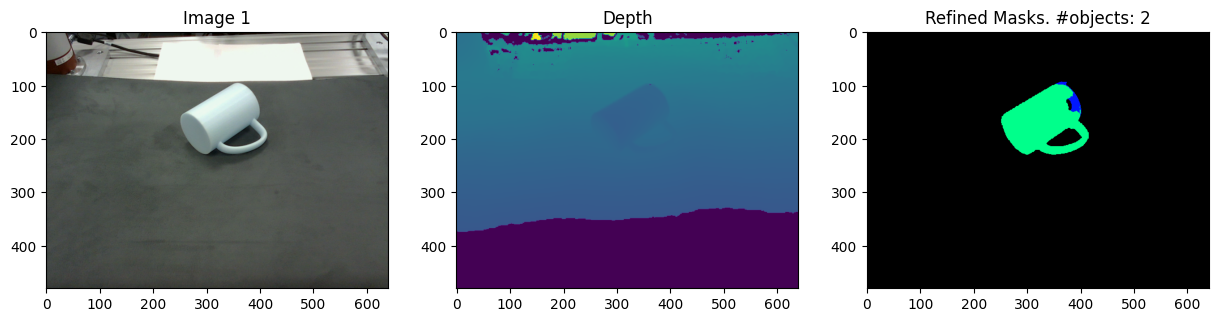

In [52]:
plot_information = plot_informations[0]
util_.subplotter(plot_information[0], titles=plot_information[1], fig_num=1, plot_width=5)

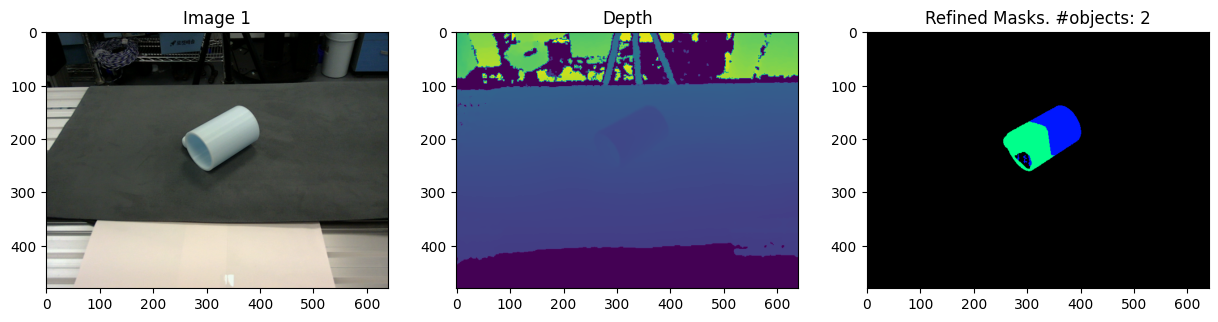

In [53]:
plot_information = plot_informations[1]
util_.subplotter(plot_information[0], titles=plot_information[1], fig_num=1, plot_width=5)

In [54]:
pcds_o3d, frames_o3d = perc.visualize_scene(pcds)

In [55]:
o3d.visualization.draw_geometries(pcds_o3d+frames_o3d)

In [60]:
est_const = [0.47, 0.005]

perc.get_T_object_wrt_world(pcds, "cup", est_const)

:: Load two point clouds and disturb initial pose.
PointCloud with 1000 points.
PointCloud with 1000 points.
:: Downsample with a voxel size 0.200.
:: Estimate normal with search radius 0.400.
:: Compute FPFH feature with search radius 1.000.
:: Downsample with a voxel size 0.200.
:: Estimate normal with search radius 0.400.
:: Compute FPFH feature with search radius 1.000.
:: RANSAC registration on downsampled point clouds.
   Since the downsampling voxel size is 0.200,
   we use a liberal distance threshold 0.300.
:: Point-to-plane ICP registration is applied on original point
   clouds to refine the alignment. This time we use a strict
   distance threshold 0.004.
:: RANSAC registration on downsampled point clouds.
   Since the downsampling voxel size is 0.200,
   we use a liberal distance threshold 0.300.
:: Point-to-plane ICP registration is applied on original point
   clouds to refine the alignment. This time we use a strict
   distance threshold 0.004.
RegistrationResult with f

array([[ 0.66923775, -0.72396164, -0.16733314,  0.0793765 ],
       [-0.11105849,  0.12521147, -0.98589457,  0.01710622],
       [ 0.73470187,  0.67838163,  0.00339416,  0.0243838 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])